### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [84]:
data = pd.read_csv('data/coupons.csv')

In [85]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [86]:

missing_values = data.isnull().sum()

missing_percentage = (data.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percentage
})

missing_summary[missing_summary['Missing Values'] > 0]


,Missing Values,Missing (%)
car,12576,99.15
Bar,107,0.84
CoffeeHouse,217,1.71
CarryAway,151,1.19
RestaurantLessThan20,130,1.02
Restaurant20To50,189,1.49


3. Decide what to do about your missing data -- drop, replace, other...

In [87]:
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in columns_to_impute:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)


4. What proportion of the total observations chose to accept the coupon?



In [88]:
total_observations = len(data)
accepted_observations = data['Y'].sum()  # Since Y=1 for accepted, this works directly

proportion_accepted = accepted_observations / total_observations

print(f"Proportion of customers who accepted the coupon: {proportion_accepted:.2%}")


Proportion of customers who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

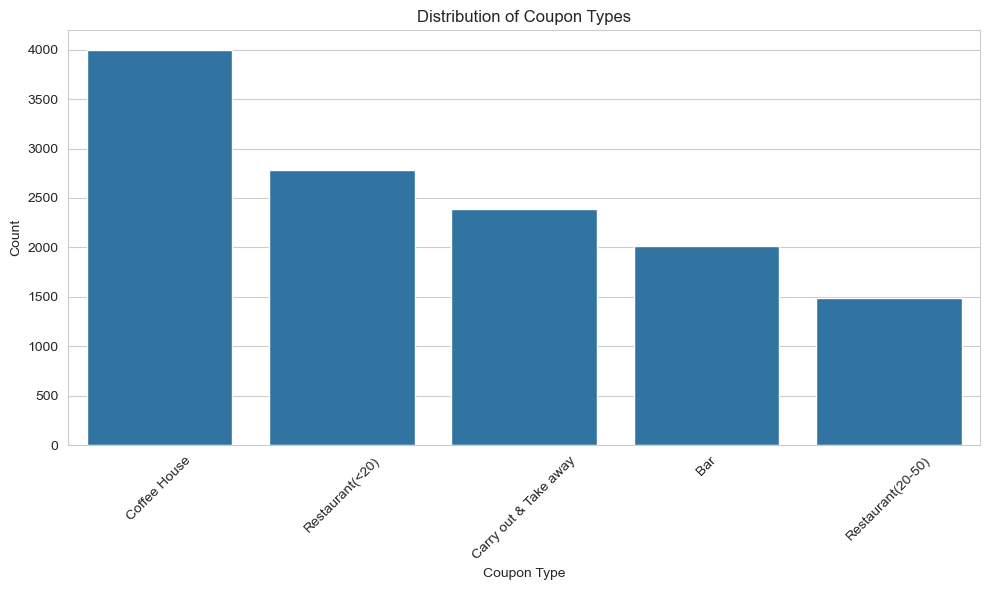

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, hue=None)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/distribution_of_coupon_types.png', dpi=300)
plt.show()

6. Use a histogram to visualize the temperature column.

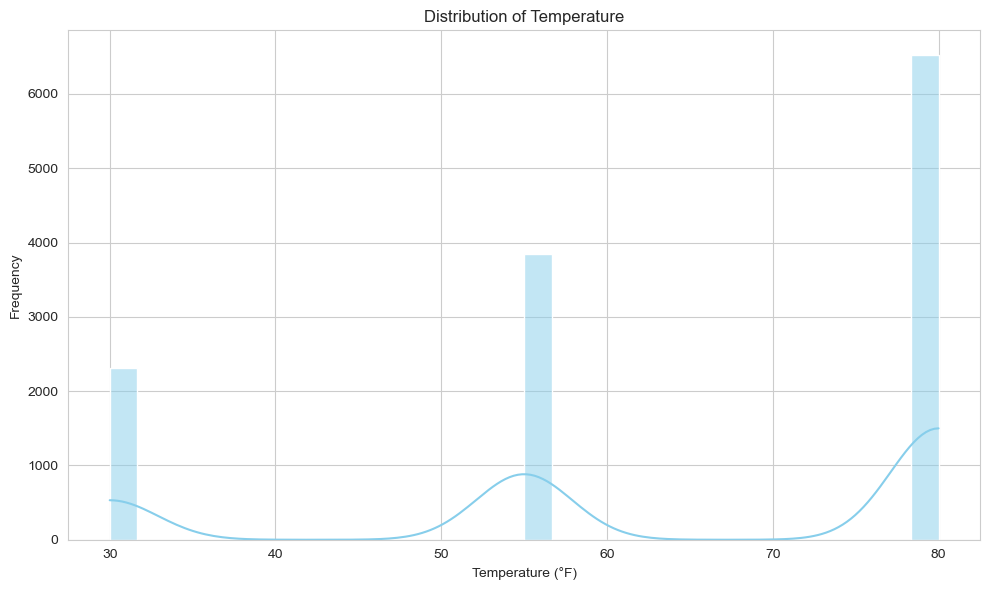

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(data['temperature'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('images/temperature_distribution.png')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [91]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [92]:
total_bar = len(bar_coupons)
accepted_bar = bar_coupons['Y'].sum()  # since Y=1 means accepted

proportion_accepted_bar = accepted_bar / total_bar

print(f"Proportion of Bar coupons accepted: {proportion_accepted_bar:.2%}")


Proportion of Bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [93]:
def bar_frequency_group(x):
    if x in ['never', 'less1', '1~3']:
        return '3 or fewer times'
    else:
        return 'More than 3 times'

bar_coupons['Bar_freq_group'] = bar_coupons['Bar'].apply(bar_frequency_group)

acceptance_rates = bar_coupons.groupby('Bar_freq_group')['Y'].mean()

for group, rate in acceptance_rates.items():
    print(f"Acceptance rate for {group}: {rate:.2%}")


Acceptance rate for 3 or fewer times: 37.07%
Acceptance rate for More than 3 times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [94]:
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

bar_coupons = bar_coupons.dropna(subset=['age'])

def goes_to_bar_more_than_once(x):
    # Categories indicating more than once a month
    if x in ['4~8', 'gt8']:
        return True
    else:
        return False

bar_coupons['Bar_freq_more_than_once'] = bar_coupons['Bar'].apply(goes_to_bar_more_than_once)

bar_coupons['Age_over_25'] = bar_coupons['age'] > 25

bar_coupons['Target_Group'] = bar_coupons['Bar_freq_more_than_once'] & bar_coupons['Age_over_25']

acceptance_rates = bar_coupons.groupby('Target_Group')['Y'].mean()

print("Acceptance rates:")
print(f"Drivers >25 years old and go to bar > once/month: {acceptance_rates.get(True, 0):.2%}")
print(f"All other drivers: {acceptance_rates.get(False, 0):.2%}")


Acceptance rates:
Drivers >25 years old and go to bar > once/month: 77.69%
All other drivers: 40.17%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [95]:
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
bar_coupons = bar_coupons.dropna(subset=['age'])

def goes_to_bar_more_than_once(x):
    return x in ['4~8', 'gt8']

bar_coupons['Bar_freq_more_than_once'] = bar_coupons['Bar'].apply(goes_to_bar_more_than_once)

bar_coupons['Passenger_not_kid'] = bar_coupons['passanger'] != 'Kid(s)'

excluded_occupations = ['Farmers', 'Fishing', 'Forestry']
bar_coupons['Occupation_other'] = ~bar_coupons['occupation'].isin(excluded_occupations)

bar_coupons['Target_Group'] = (bar_coupons['Bar_freq_more_than_once'] & 
                               bar_coupons['Passenger_not_kid'] & 
                               bar_coupons['Occupation_other'])

acceptance_rates = bar_coupons.groupby('Target_Group')['Y'].mean()

print("Acceptance rates:")
print(f"Drivers who visit bar > once/month, no kids as passengers, and non-farming occupations: {acceptance_rates.get(True, 0):.2%}")
print(f"All other drivers: {acceptance_rates.get(False, 0):.2%}")


Acceptance rates:
Drivers who visit bar > once/month, no kids as passengers, and non-farming occupations: 77.97%
All other drivers: 38.71%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [96]:
import pandas as pd

bar_coupons = data[data['coupon'] == 'Bar'].copy()
print(f"bar_coupons shape: {bar_coupons.shape}")

age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
bar_coupons['age'] = bar_coupons['age'].map(age_map)

income_map = {
    'Less than $12500': 12000,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 100000
}
bar_coupons['income'] = bar_coupons['income'].map(income_map)

bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
bar_coupons['income'] = pd.to_numeric(bar_coupons['income'], errors='coerce')

age_median = bar_coupons['age'].median()
income_median = bar_coupons['income'].median()

bar_coupons['age'] = bar_coupons['age'].fillna(age_median)
bar_coupons['income'] = bar_coupons['income'].fillna(income_median)

print(f"bar_coupons shape after filling missing age/income: {bar_coupons.shape}")

def goes_to_bar_more_than_once(x):
    return x in ['4~8', 'gt8']

def goes_to_cheap_rest_more_than_4(x):
    return x in ['4~8', 'gt8']

bar_coupons['Bar_freq_more_than_once'] = bar_coupons['Bar'].apply(goes_to_bar_more_than_once)
bar_coupons['Cheap_rest_freq_more_than_4'] = bar_coupons['RestaurantLessThan20'].apply(goes_to_cheap_rest_more_than_4)

group1 = (bar_coupons['Bar_freq_more_than_once']) & \
         (bar_coupons['passanger'] != 'Kid(s)') & \
         (bar_coupons['maritalStatus'] != 'Widowed')

group2 = (bar_coupons['Bar_freq_more_than_once']) & \
         (bar_coupons['age'] < 30)

group3 = (bar_coupons['Cheap_rest_freq_more_than_4']) & \
         (bar_coupons['income'] < 50000)

bar_coupons['Group'] = 'Others'

bar_coupons.loc[group1, 'Group'] = 'Group 1'
bar_coupons.loc[~group1 & group2, 'Group'] = 'Group 2'
bar_coupons.loc[~group1 & ~group2 & group3, 'Group'] = 'Group 3'

acceptance_rates = bar_coupons.groupby('Group')['Y'].mean()

print("\nGroup sizes:")
print(bar_coupons['Group'].value_counts())

print("\nAcceptance rates by group:")
for group, rate in acceptance_rates.items():
    print(f"{group}: {rate:.2%}")


bar_coupons shape: (2017, 26)
bar_coupons shape after filling missing age/income: (2017, 26)

Group sizes:
Group
Others     1544
Group 3     281
Group 1     191
Group 2       1
Name: count, dtype: int64

Acceptance rates by group:
Group 1: 77.49%
Group 2: 100.00%
Group 3: 37.01%
Others: 37.18%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [97]:
"Frequent bar visitors, especially younger and socially active drivers without young children or widowhood, are the primary group that accepts bar coupons. They are more motivated by such offers, likely due to their existing habits and social lifestyle."

'Frequent bar visitors, especially younger and socially active drivers without young children or widowhood, are the primary group that accepts bar coupons. They are more motivated by such offers, likely due to their existing habits and social lifestyle.'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  